In [1]:
### Imports and Constants ###
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from math import e
import time
 
inputSize = 2
outputSize = 1

In [2]:
### Helper functions ###
def getLearningRate(i):
    m = 0.1
    r = 0.00000138155
    return m* e**(-i*r)

def createModel(hParams, inVec, activ = tf.sigmoid):
    n = len(hParams)
    weights = [ tf.Variable(tf.random_uniform([hParams[0], hParams[1]])) ]
    biases = [ tf.Variable(tf.random_uniform([hParams[1]])) ]
    hiddens = [inVec]
    for i in range(1,n-1):
        hiddens.append(activ(tf.matmul(hiddens[-1],weights[-1])+biases[-1]))
        Wi = tf.Variable(tf.random_uniform([hParams[i], hParams[i+1]]))
        weights.append(Wi)
        bi = tf.Variable(tf.random_uniform([hParams[i+1]]))
        biases.append(bi)
    yHat = tf.matmul(hiddens[-1], weights[-1]) + biases[-1]
    return yHat

def toyData(x,n):
    y = np.zeros([n,outputSize])
    for i in range(n):
        a,b = x[i]
        y[i] = 10.314*a**2 + 15.52*b**2
    return y

In [3]:
# Placeholders
x = tf.placeholder(tf.float32, [None, inputSize])
y = tf.placeholder(tf.float32, [None, outputSize])
learningRate = tf.placeholder(tf.float32, [])

#Model Parameters
params = [inputSize, 4, outputSize]
yHat = createModel(params, x)

#Loss function
loss = tf.reduce_sum(tf.square(yHat-y))

#Optimizer
optimizer = tf.train.AdamOptimizer(learningRate)
train = optimizer.minimize(loss)

In [4]:
#Training Data
numExamples = 500
x_data = np.random.rand(numExamples,inputSize)

y_data = toyData(x_data, numExamples)

#Divide to test and train data
x_train = x_data[:int(numExamples/2)]
y_train = y_data[:int(numExamples/2)]
x_test = x_data[int(numExamples/2):]
y_test = y_data[int(numExamples/2):]

training_data = {x:x_train, y:y_train}
testing_data = {x:x_test, y:y_test}

In [5]:
#Session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Pre-Check
trainingLoss = sess.run(loss, training_data)
testingLoss = sess.run(loss, testing_data)
print("Pre-Training Losses")
print("Training: " + str(trainingLoss))
print("Testing: " + str(testingLoss))

Pre-Training Losses
Training: 21317.7
Testing: 21364.6


In [6]:
#Training
startTime = time.time()
duration = 60
interval = 15
lastPrint = startTime
i = 0

#Train for 'duration' seconds
while time.time()-startTime < duration:
    #Print an update every 'interval' seconds
    if time.time()-lastPrint >interval:
        l = sess.run(loss, training_data)
        print("Itteration: " + str(i) + " Loss: " + str(l))
        lastPrint = time.time()
    
    training_data[learningRate] = getLearningRate(i)
    sess.run(train, training_data)
    i += 1

In [7]:
#Post-Check
trainingLoss = sess.run(loss, training_data)
testingLoss = sess.run(loss, testing_data)
print("Post-Training Losses")
print("Training: " + str(trainingLoss))
print("Testing: " + str(testingLoss))

Post-Training Losses
Training: 0.337893
Testing: 0.445006


<IPython.core.display.Javascript object>


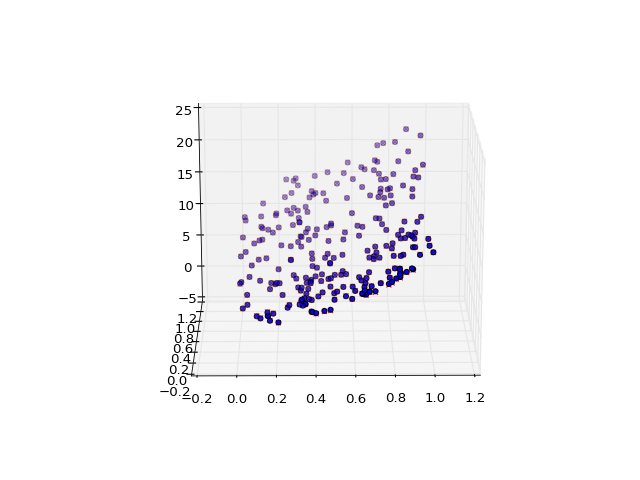

In [8]:
### Graph the models prediction ###
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xgraph = []
Ygraph = []
ZactGraph = []
ZpredGraph = []
# I originally just put all the data through the model at once,
# but that didn't preserve order for what ever reason so the graphs
# looked like trash. This loop fixes that.
for inputVal in x_test:
    X = inputVal[0]
    Y = inputVal[1]
    ZActual = toyData(np.asarray([inputVal]),1)
    pred = sess.run(yHat, {x:[inputVal]})

    Xgraph.append(X)
    Ygraph.append(Y)
    ZactGraph.append(ZActual)
    ZpredGraph.append(pred)

ax.scatter(Xgraph, Ygraph, ZactGraph, c = 'b', marker = 'o')
ax.scatter(Xgraph, Ygraph, ZpredGraph, c = 'r', marker = 'x')

plt.show()